 # **Detecting Checked Boxes:** *A Computer Vision Approach to Digital Well-Being Tracker Sheets*

Hey everyone! 👋 It's been a while since I last shared anything on Kaggle, but I'm excited to jump back in today with a fun project. For those who don't know me, I'm Jeevabharathi, a second-year B.Tech student diving headfirst into the world of Artificial Intelligence and Data Science.
So, what's the scoop for today? Well, during my winter internship, I was tasked with a pretty interesting challenge: detecting checked boxes in a "digital well-being tracker sheet" using only computer vision. No fancy machine learning stuff, just good ol' CV. And you know what? I'm here to show you how it's done.
Now, before you roll your eyes and think, "What's the big deal?" Hear me out. Sure, it might not be the most groundbreaking AI wizardry, but sometimes, it's the simple stuff that lays the foundation for bigger things. Plus, who doesn't love a bit of problem-solving, right?
So, stick around as I walk you through the basics of computer vision and how we can tackle real-world problems with it. Whether you're a seasoned pro or just getting started, I guarantee there's something here for everyone. Let's dive in!

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
template_image = cv2.imread("/kaggle/input/images/Template_image.png")
query_image = cv2.imread("/kaggle/input/images/Query_image.jpg")


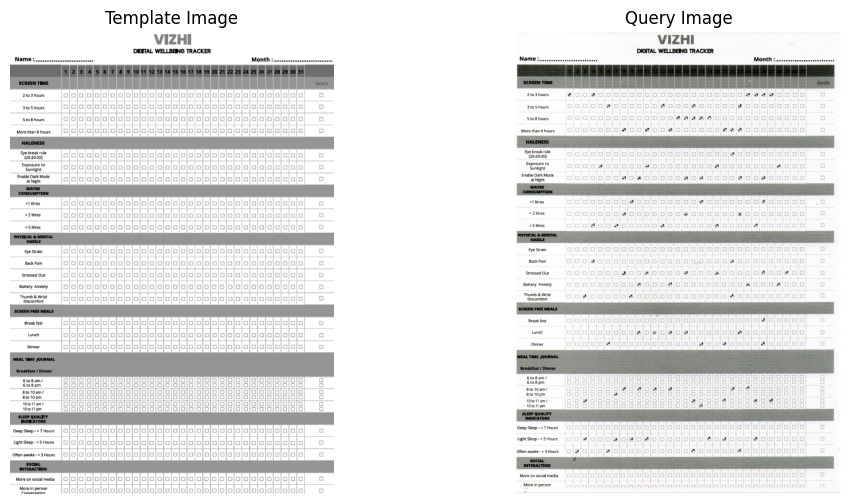

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), frameon=False)
axes[0].imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Template Image')
axes[0].axis('off')  
axes[1].imshow(cv2.cvtColor(query_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Query Image')
axes[1].axis('off')  
plt.show()

The template image was initially provided to me as a PDF. I then printed it out and manually marked a few checkboxes. After that, I scanned the marked sheet using my scanner. We'll be focusing our efforts on this scanned image with the checkboxes marked.


Let's start by creating an empty DataFrame that aligns with our template. We'll include the following fields:

* 'Name'
* 'ScreenTime(2 to 3 hours)'
* 'ScreenTime(3 to 5 hours)'
* 'ScreenTime(5 to 8 hours)'
* 'ScreenTime(>8 hours)'
* 'Haleness(Eye break Rule)'
* 'Haleness(Exposure to sunlight)'
* 'Haleness(Enable dark mode at night)'
* 'WaterConsumption(<1 litres)'
* 'WaterConsumption(<2 litres)'
* 'WaterConsumption(<5 litres)'
* 'EyeStrain'
* 'BackPain'
* 'StressedOut'
* 'BatteryAnxiety'
* 'Thumb&Wrist Discomfort'
* 'ScreenfreeMeals(Breakfast)'
* 'ScreenfreeMeals(Lunch)'
* 'ScreenfreeMeals(Dinner)'
* 'MTJ-BD(6 to 8am)'
* 'MTJ-BD(6 to 8pm)'
* 'MTJ-BD(8 to 10am)'
* 'MTJ-BD(8 to 10pm)'
* 'MTJ-BD(10 to 11am)'
* 'MTJ-BD(10 to 11pm)'
* 'DeepSleep'
* 'LightSleep'
* 'OftenAwake'
MTJ - Meal time journal

We'll use this DataFrame to organize and store our data as we progress through the project.


In [3]:
data = pd.DataFrame(columns=[
    'Name',
    'ScreenTime(2 to 3 hours)',
    'ScreenTime(3 to 5 hours)',
    'ScreenTime(5 to 8 hours)',
    'ScreenTime(>8 hours)',
    'Haleness(Eye break Rule)',
    'Haleness(Exposure to sunlight)',
    'Haleness(Enable dark mode at night)',
    'WaterConsumption(<1 litres)',
    'WaterConsumption(<2 litres)',
    'WaterConsumption(<5 litres)',
    'EyeStrain',
    'BackPain',
    'StressedOut',
    'BatteryAnxiety',
    'Thumb&Wrist Discomfort',
    'ScreenfreeMeals(Breakfast)',
    'ScreenfreeMeals(Lunch)',
    'ScreenfreeMeals(Dinner)',
    'MTJ-BD(6 to 8am)',
    'MTJ-BD(6 to 8pm)',
    'MTJ-BD(8 to 10am)',
    'MTJ-BD(8 to 10pm)',
    'MTJ-BD(10 to 11am)',
    'MTJ-BD(10 to 11pm)',
    'DeepSleep',
    'LightSleep',
    'OftenAwake'
])
# name = input("Enter your name: ")
# data.loc[0, 'Name'] = name
data.loc[0, 'Name'] = "Cheems"
data.head()

Name ScreenTime(2 to 3 hours) ScreenTime(3 to 5 hours)  \
0  Cheems                      NaN                      NaN   

  ScreenTime(5 to 8 hours) ScreenTime(>8 hours) Haleness(Eye break Rule)  \
0                      NaN                  NaN                      NaN   

  Haleness(Exposure to sunlight) Haleness(Enable dark mode at night)  \
0                            NaN                                 NaN   

  WaterConsumption(<1 litres) WaterConsumption(<2 litres)  ...  \
0                         NaN                         NaN  ...   

  ScreenfreeMeals(Dinner) MTJ-BD(6 to 8am) MTJ-BD(6 to 8pm) MTJ-BD(8 to 10am)  \
0                     NaN              NaN              NaN               NaN   

  MTJ-BD(8 to 10pm) MTJ-BD(10 to 11am) MTJ-BD(10 to 11pm) DeepSleep  \
0               NaN                NaN                NaN       NaN   

  LightSleep OftenAwake  
0        NaN        NaN  

[1 rows x 28 columns]

our dataframe is ready ! lets move on to our CV part

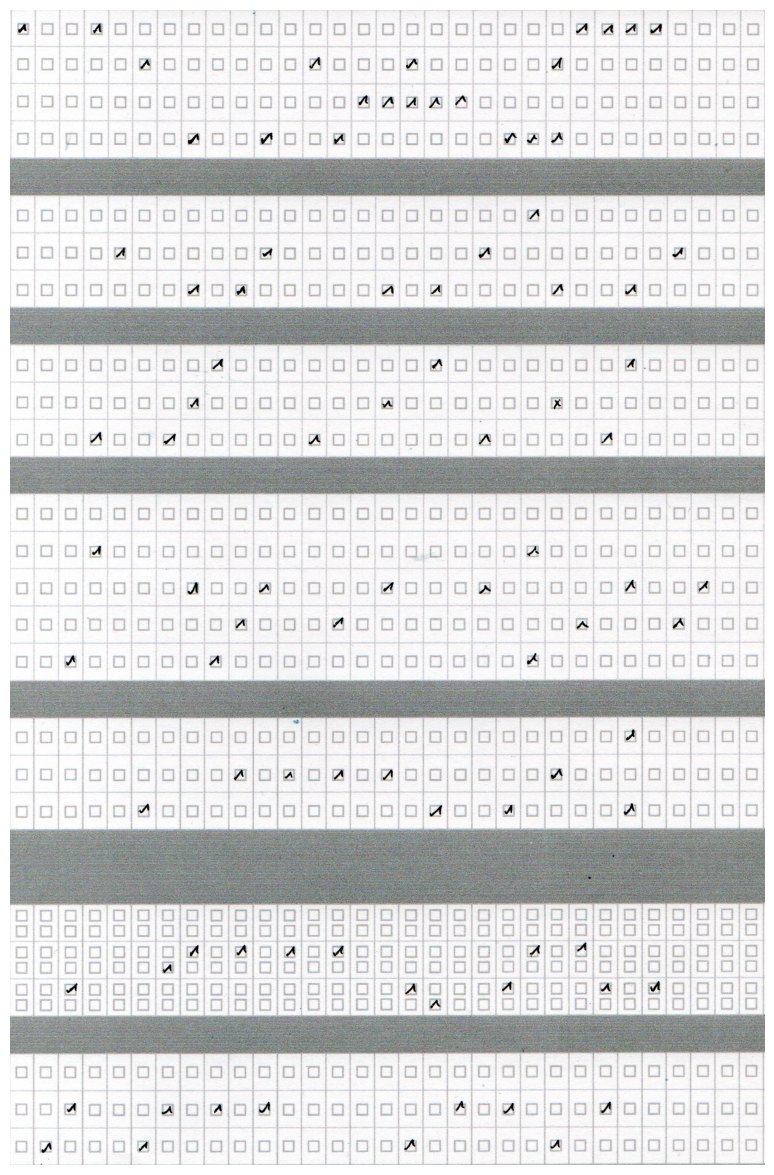

In [4]:
x1, y1, x2, y2 = 375, 430, 2202, 3225
query = query_image[y1:y2, x1:x2]
plt.figure(figsize=(15, 15))
plt.imshow(query)
plt.axis('off')
plt.show()

So, here's the deal: I'm using this snippet to chop up the query image. You see, I've got these coordinates - 'x1', 'x2', 'y1', and 'y2' - that basically tell the code where to slice. But hey, here's the kicker: those numbers? Yeah, they might change depending on the image we're dealing with. So, it's kind of like a customizable slice-and-dice situation, ya feel?

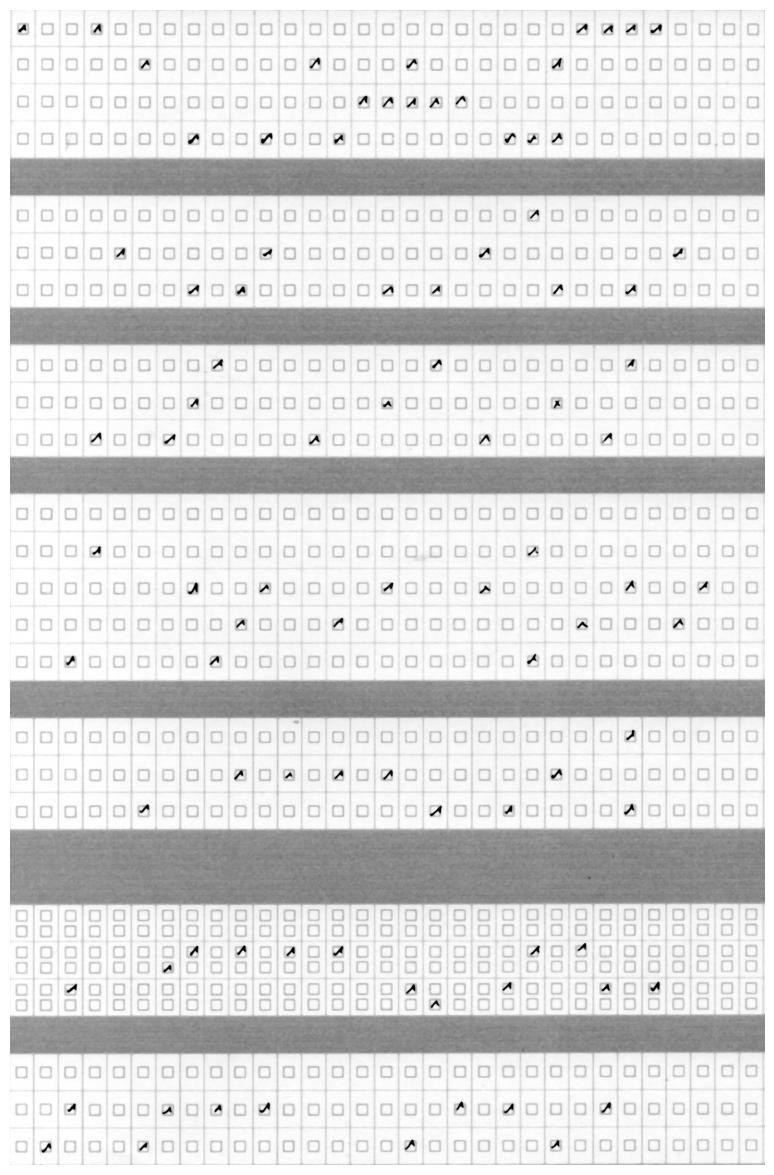

In [5]:
gray = cv2.cvtColor(query,cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(cv2.medianBlur(gray, 5), 5)
plt.figure(figsize=(15, 15))
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show()

So, check it out: first things first, we're converting our cropped image to grayscale with cv2.cvtColor(). Why grayscale, you ask? Well, it helps simplify things and makes it easier for our code to process.

Next up, we're diving into some blurring action with cv2.medianBlur(). Think of it like putting on a pair of glasses that slightly smudges things - it helps smooth out the image and gets rid of any pesky noise that might mess with our results. And hey, we're doing it twice just to really make sure things are nice and smooth!

Now, onto the main event: thresholding. This part's all about drawing a line in the sand (or, you know, the pixels) and saying, "Hey, anything below this line, you're out!" We're using cv2.threshold() to set our threshold values and create a binary image where the background is black and the foreground is white. It's like magic, but with pixels.

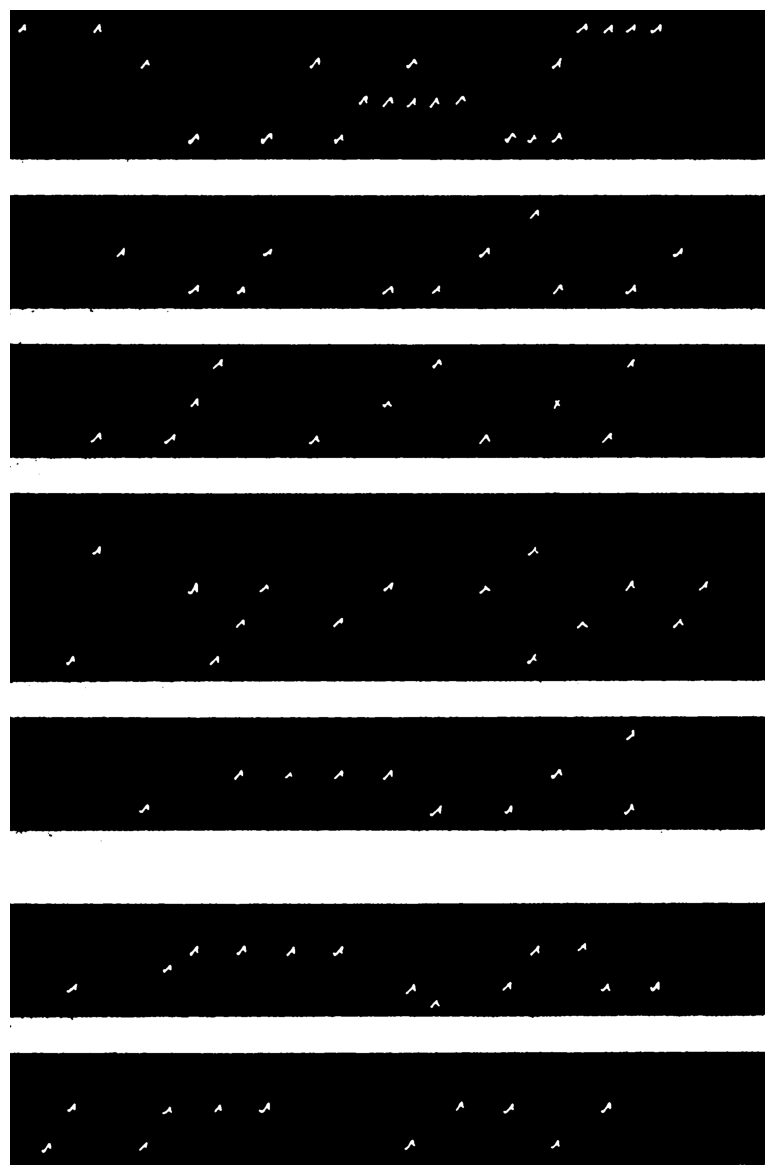

In [6]:
thresh = cv2.threshold(blur, 160, 355, cv2.THRESH_BINARY_INV)[1]
plt.figure(figsize=(15, 15))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

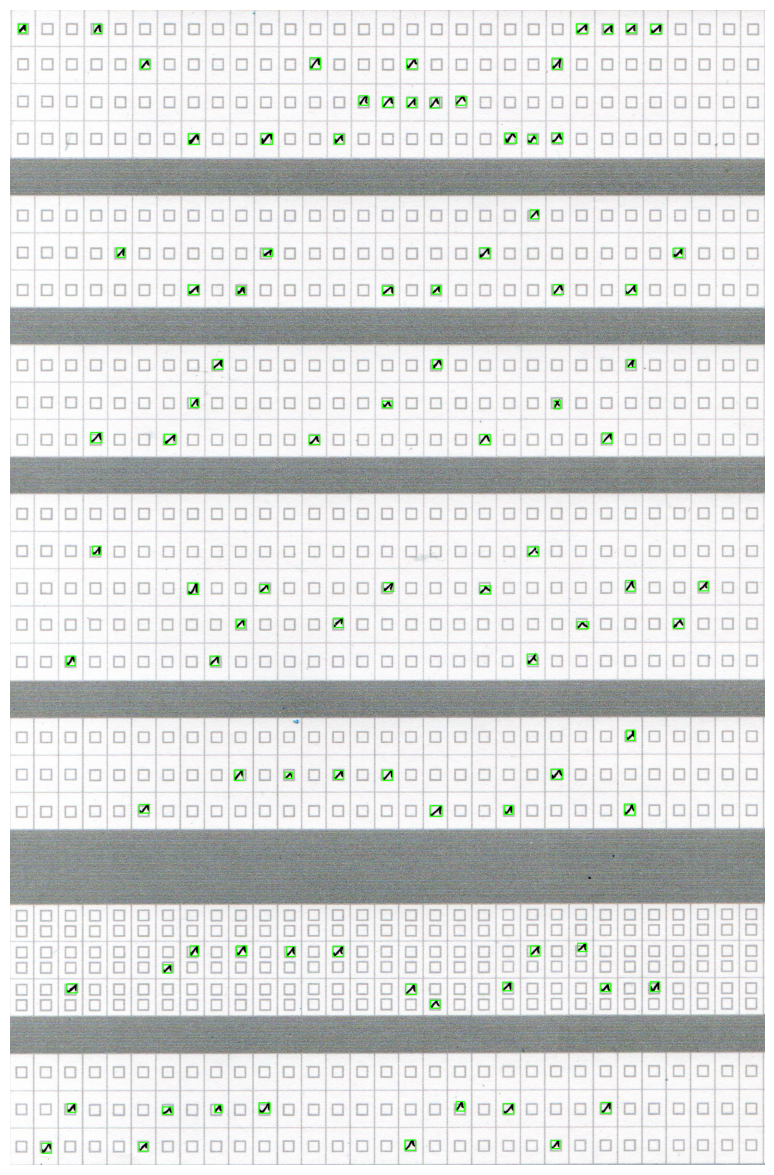

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
min_area = 100
max_area = 2200
count = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        ROI = query[y:y+h, x:x+w]
        cv2.rectangle(query, (x, y), (x + w, y + h), (36,255,12), 2)
        count += 1
plt.figure(figsize=(15, 15))
plt.imshow(query, cmap='gray')
plt.axis('off')
plt.show()

So, here's the lowdown: We're starting off by crafting ourselves a little helper with cv2.getStructuringElement(). This helper, known as a structuring element, is like a mini stencil that defines the shape and size of the neighborhood we'll be working with later on.

Next up, we're stepping into the world of morphological operations with cv2.morphologyEx(). This operation, known as closing, is like a digital makeover for our image. It smooths out any rough patches and fills in any gaps or holes, making everything look spick and span.

Now, onto the fun part: hunting down contours! We're using cv2.findContours() to scour our image for those little shapes that stand out. Once we've sniffed them out, we're sizing them up and checking if they meet our criteria. If they're not too big or too small, we're giving them the VIP treatment with a slick bounding box using cv2.rectangle().

And there you have it! Our image is now decked out with these snazzy rectangles, highlighting the contours we're interested in. It's like we're playing detective with pixels, and we've cracked the case wide open!

In [8]:
print("Number of Checked boxes in the whole Query Image :", count)

Number of Checked boxes in the whole Query Image : 92



Alright, let's break this down with a bit more detail:

So, here's the deal: We've got a whole bunch of checked boxes scattered across our image, but just knowing the total count isn't enough to fill up our DataFrame. We need to get down to the nitty-gritty and count each row individually. And hey, I'm all about options, so if you've got different ideas on how to tackle this, feel free to drop them in the comments!

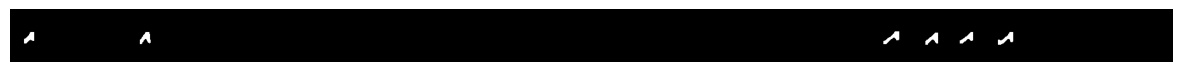

Number of Checked Boxes: 6


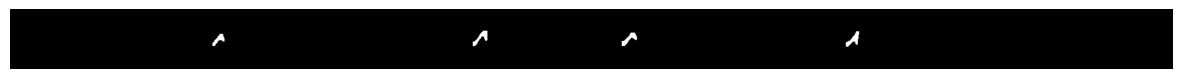

Number of Checked Boxes: 4


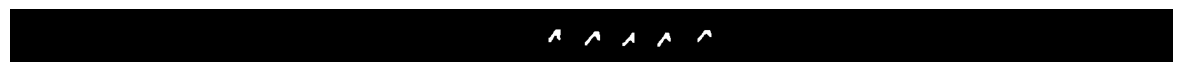

Number of Checked Boxes: 5


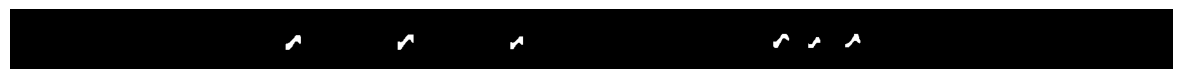

Number of Checked Boxes: 6


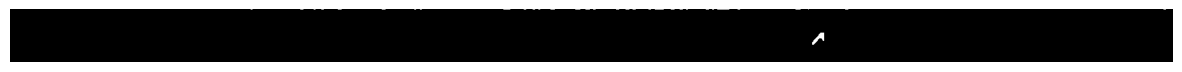

Number of Checked Boxes: 1


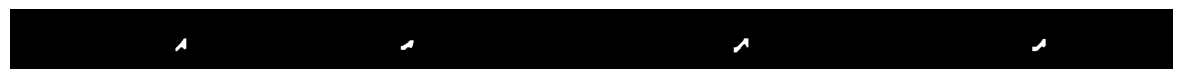

Number of Checked Boxes: 4


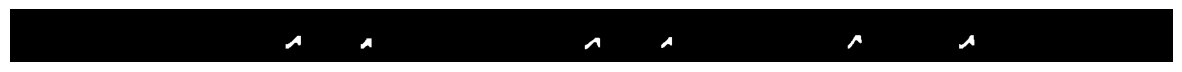

Number of Checked Boxes: 6


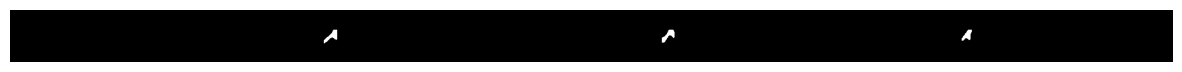

Number of Checked Boxes: 3


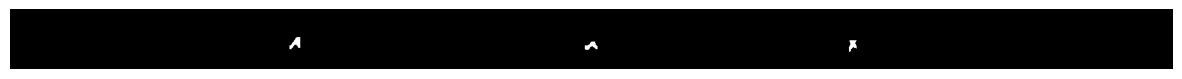

Number of Checked Boxes: 3


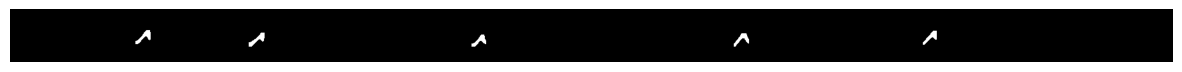

Number of Checked Boxes: 5


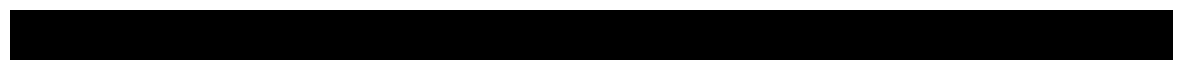

Number of Checked Boxes: 0


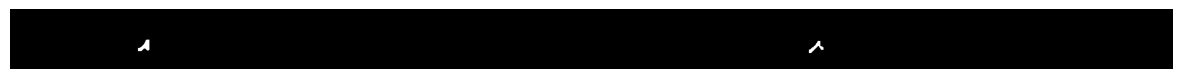

Number of Checked Boxes: 2


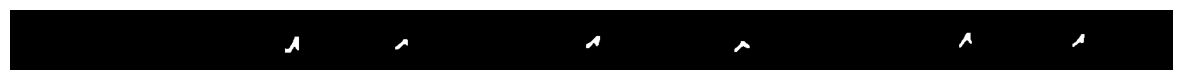

Number of Checked Boxes: 6


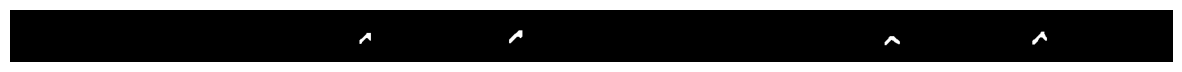

Number of Checked Boxes: 4


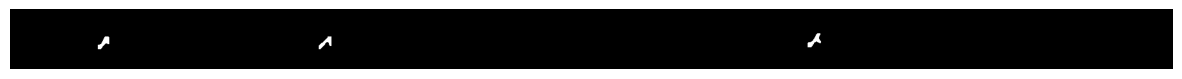

Number of Checked Boxes: 3


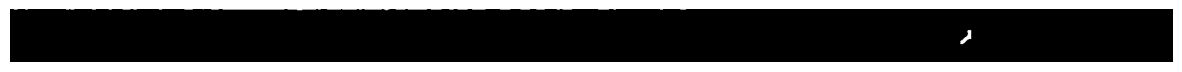

Number of Checked Boxes: 1


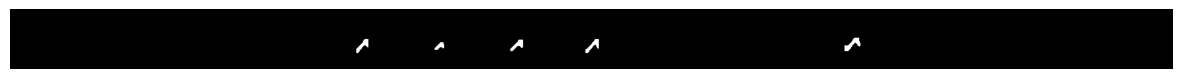

Number of Checked Boxes: 5


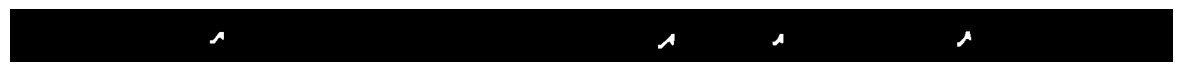

Number of Checked Boxes: 4


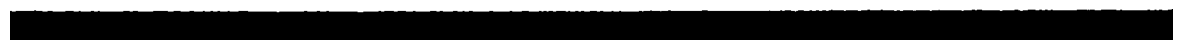

Number of Checked Boxes: 0


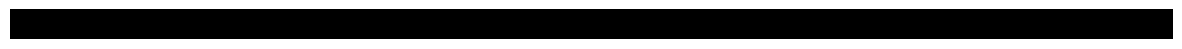

Number of Checked Boxes: 0


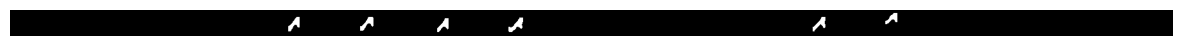

Number of Checked Boxes: 6


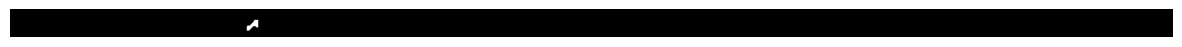

Number of Checked Boxes: 1


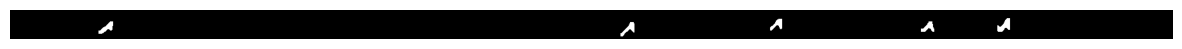

Number of Checked Boxes: 5


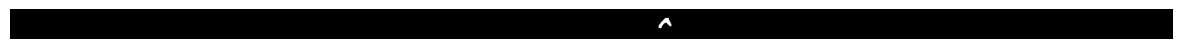

Number of Checked Boxes: 1


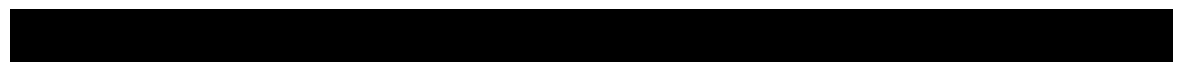

Number of Checked Boxes: 0


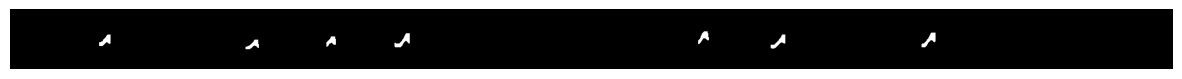

Number of Checked Boxes: 7


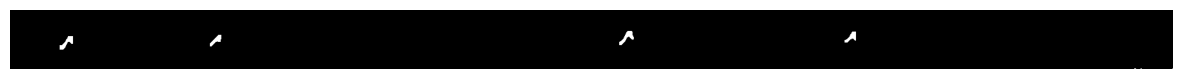

Number of Checked Boxes: 4


In [9]:
x1 = 0
x2 = thresh.shape[1]
y_values = [
    (0, 83), (83, 177), (177, 260), (260, 354), (448, 531), (531, 625),
    (625, 708), (815, 897), (897, 991), (991, 1074), (1172, 1251),
    (1251, 1345), (1345, 1440), (1440, 1522), (1522, 1616), (1711, 1794),
    (1794, 1888), (1888, 1971), (2159, 2207), (2207, 2254), (2254, 2295),
    (2295, 2339), (2339, 2385), (2384, 2431), (2525, 2608), (2608, 2702),
    (2702, 2795)
]

min_area = 100
max_area = 2300
arr1 = []

for y1, y2 in y_values:
    crop = thresh[y1:y2, x1:x2]

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    close = cv2.morphologyEx(crop, cv2.MORPH_CLOSE, kernel, iterations=2)
    cnts, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    image_number = 0
    for c in cnts:
        area = cv2.contourArea(c)
        if min_area < area < max_area:
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(crop, (x, y), (x + w, y + h), (0, 0, 255), 2)
            image_number += 1
            
    plt.figure(figsize=(15, 15))
    plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    print(f'Number of Checked Boxes: {image_number}')
    arr1.append(image_number)


Now, onto the action: we're diving into the rows of our image, cropping each one out and giving it a once-over. Those coordinates you see? Yeah, they're hand-picked and might shift a bit depending on the image, so keep that in mind.

Once we've got our row isolated, it's time to go hunting for those elusive checked boxes. We're using a little trick called morphological closing to smooth things out and make those boxes pop. Then, it's contour city as we scour each row for those telltale shapes.

And bingo! We've found 'em. We're tallying up the count for each row and storing it in an array. It's like playing a game of hide-and-seek with pixels, and we're coming out on top!

In [10]:
data.loc[0, data.columns[1:]] = arr1
data.head()

Name ScreenTime(2 to 3 hours) ScreenTime(3 to 5 hours)  \
0  Cheems                        6                        4   

  ScreenTime(5 to 8 hours) ScreenTime(>8 hours) Haleness(Eye break Rule)  \
0                        5                    6                        1   

  Haleness(Exposure to sunlight) Haleness(Enable dark mode at night)  \
0                              4                                   6   

  WaterConsumption(<1 litres) WaterConsumption(<2 litres)  ...  \
0                           3                           3  ...   

  ScreenfreeMeals(Dinner) MTJ-BD(6 to 8am) MTJ-BD(6 to 8pm) MTJ-BD(8 to 10am)  \
0                       4                0                0                 6   

  MTJ-BD(8 to 10pm) MTJ-BD(10 to 11am) MTJ-BD(10 to 11pm) DeepSleep  \
0                 1                  5                  1         0   

  LightSleep OftenAwake  
0          7          4  

[1 rows x 28 columns]

All done! That's how I tackled this task. Just a heads-up, I'm just a 19-year-old student learning the ropes, so there might be simpler techniques out there to solve this. Don't hesitate to drop your thoughts in the comments section!

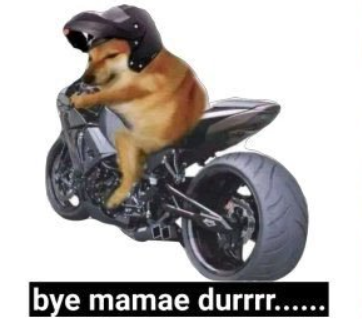

Untill then, Bye. ThankYou